This notebook will:
 - Load RFM
 - Scale features
 - Apply KMeans
 - Create clusters
 - Add visual justification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
rfm = pd.read_csv("../outputs/rfm.csv")
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [3]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(
    rfm[['Recency', 'Frequency', 'Monetary']]
)

In [5]:
# --------------------KMeans (4 clusters)--------------------
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm['Cluster'].value_counts()

Cluster
3    3053
1    1062
0     211
2      13
Name: count, dtype: int64

In [6]:
rfm.to_csv("../outputs/rfm_clusters.csv", index=False)
print("RFM with clusters saved")

RFM with clusters saved


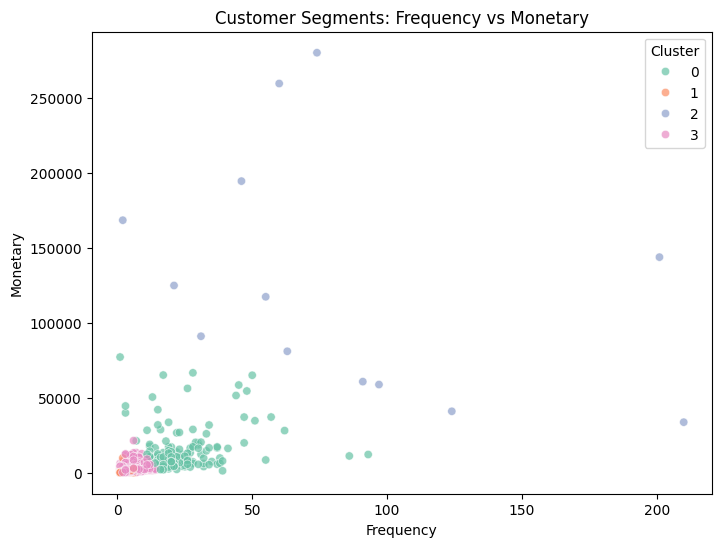

In [7]:
# Visualization: Frequency vs Monetary

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=rfm,
    x="Frequency",
    y="Monetary",
    hue="Cluster",
    palette="Set2",
    alpha=0.7
)
plt.title("Customer Segments: Frequency vs Monetary")
plt.show()

/tmp/ipykernel_7183/2798826864.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


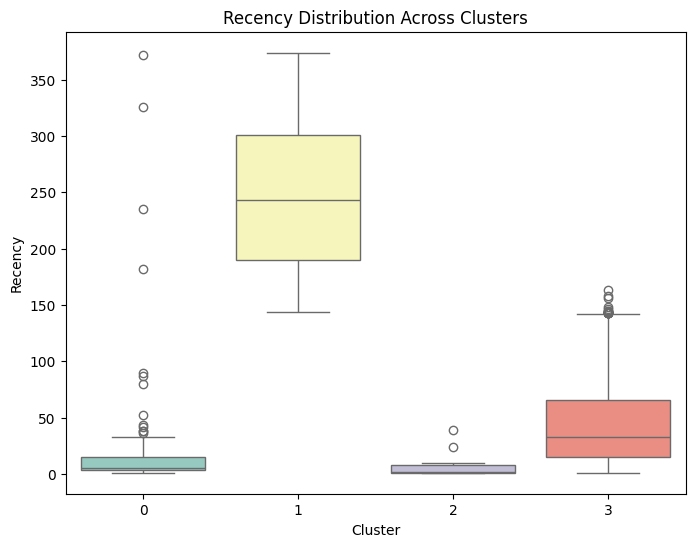

In [8]:
# Visualization: Recency per Cluster

plt.figure(figsize=(8,6))
sns.boxplot(
    data=rfm,
    x="Cluster",
    y="Recency",
    palette="Set3"
)
plt.title("Recency Distribution Across Clusters")
plt.show()